# Mining Software Repositories: OpenStack Nova Project.

### Goal

The goal of this tool and analysis is to help in capturing insights from the commits on a project repo, in this case: the openstack nova project repo. This will help in understanding the project as well as provide guidiance to contributors and maintainers.

### Objectives

The following questions will be answered:
* Find the most actively modified module?
* How many commits occured during the studied period?
* How much churn occurred during the studied period? Churn is defined as the sum of added and removed lines by all commits.

**NB**: This workflow is responsible for the pre-processing, analysis, and generation of insight from the collected data. It is assumed that the automated collection of the data via the script accessible in thesame folder with this notebook has been completed. The collected data will be loaded here before the other process in the workflow executes.

### Required imports:

In [1]:
# Built-in libraries
import json
import os

# The normal data science ecosystem libraries
# pandas for data wrangling
import pandas as pd

# Plotting modules and libraries required
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Required settings:

In [2]:
# Settings:
# 1. Command needed to make plots appear in the Jupyter Notebook
%matplotlib inline

# 2. Command needed to make plots bigger in the Jupyter Notebook
plt.rcParams['figure.figsize']= (12, 10)

# 3. Command needed to make 'ggplot' styled plots- professional and yet good looking theme.
plt.style.use('ggplot')

# 4. This will make the plot zoomable
# mpld3.enable_notebook()

### Other utility functions for data manipulation

In [3]:
# Utility data manipulation functions

# 1. Extract path parameters from filename
def path_parameters(dframe):
     filename = os.path.basename(dframe["filename"])
     filetype = os.path.splitext(dframe["filename"])[1]
     directory = os.path.dirname(dframe["filename"])
     
     return directory, filename, filetype

### 1. Loading the data

In [4]:
# Open and load json file
with open('data.json', encoding="utf8") as file:
    data = json.load(file)
    print("data loaded successfully")

data loaded successfully


### Data normalization

The collected commit data is a semi-structured json which has nested data similar to the image below. Files is a list of file objects. The loaded data will be normalized into a flat table using pandas.json_normalize.


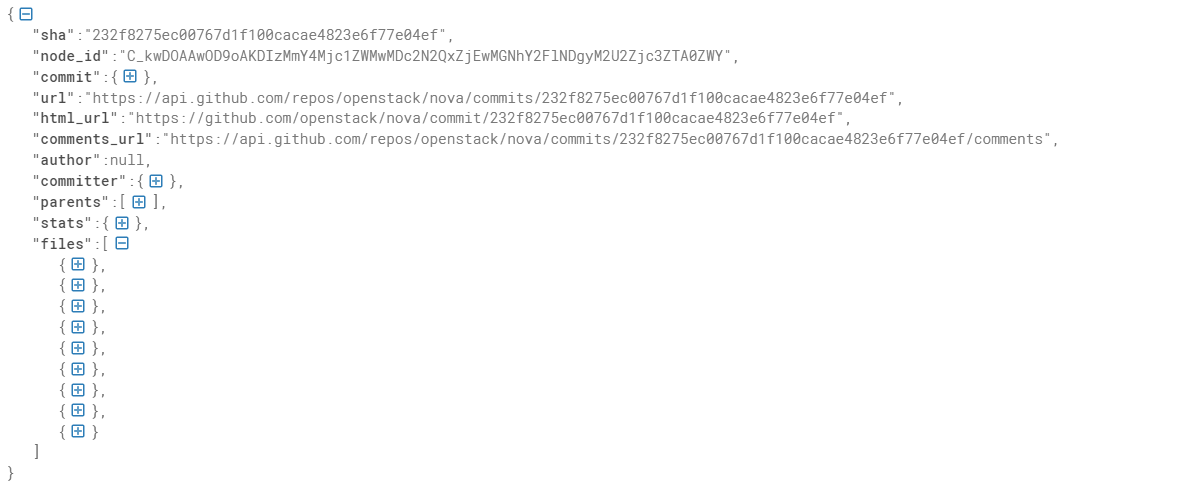

In [5]:
df = pd.json_normalize(data, "files", ["commit_node_id", "commit_sha", "commit_html_url", "commit_date" ])

### 2. Displaying current state of the data

In [6]:
# The first 5 rows
df.head()

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
0,b3f461cca42b3bc413767649e7284db3c7332f42,nova/api/openstack/compute/deferred_delete.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -40,7 +40,7 @@ def _restore(self, req, id, ...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z
1,59b9c384df60d670f526f91ffb10fa09d12ab7ba,nova/api/openstack/compute/migrate_server.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -57,7 +57,7 @@ def _migrate(self, req, id, ...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z
2,e92becb582ad1b9ac5f044f7e4b312cf76806cc0,nova/api/openstack/compute/server_metadata.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -114,7 +114,7 @@ def _update_instance_metad...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z
3,68d4ef0eeb0d71e78ff64174b477f9558bd4810f,nova/api/openstack/compute/servers.py,modified,3,4,7,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -797,8 +797,7 @@ def create(self, req, body...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z
4,a35889b9131c7c3ffe0dc06eef88ede96827c83c,nova/compute/api.py,modified,3,3,6,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -400,7 +400,7 @@ def _record_action_start(s...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z


In [7]:
# The last five rows
df.tail()

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
2196,6b397f5f5cfd4d06687dac0928b33a11a51e860a,doc/source/reference/index.rst,modified,3,0,3,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -30,6 +30,8 @@ The following is a dive into...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2197,c84ab26337f5de23e6bc55eac0988063bb83a13b,doc/source/reference/upgrade-checks.rst,modified,96,90,186,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -2,6 +2,14 @@\n Upgrade checks\n ==========...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2198,6da9ae060628f408e3188403e9d861946dfa0b54,doc/source/user/index.rst,modified,0,3,3,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -72,9 +72,6 @@ Once you are running nova, t...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2199,ef65b8940d24cea8060a3a1756553c29b89c801f,doc/test/redirect-tests.txt,modified,2,1,3,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -62,13 +62,14 @@\n /nova/latest/testing/ser...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2200,c71e899fd4872cb3b1680ea2a95d6a5ea6f91568,api-guide/source/accelerator-support.rst,modified,54,0,54,https://github.com/openstack/nova/blob/2226ec4...,https://github.com/openstack/nova/raw/2226ec4e...,https://api.github.com/repos/openstack/nova/co...,"@@ -87,3 +87,57 @@ For nested resource provide...",NaN,MDY6Q29tbWl0NzkwMDMxOjIyMjZlYzRlM2I5ZWNiZDA3MG...,2226ec4e3b9ecbd070f1545e40063ede1f1aa44a,https://github.com/openstack/nova/commit/2226e...,2021-08-12T03:06:03Z


In [8]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sha                2201 non-null   object
 1   filename           2201 non-null   object
 2   status             2201 non-null   object
 3   additions          2201 non-null   int64 
 4   deletions          2201 non-null   int64 
 5   changes            2201 non-null   int64 
 6   blob_url           2201 non-null   object
 7   raw_url            2201 non-null   object
 8   contents_url       2201 non-null   object
 9   patch              2161 non-null   object
 10  previous_filename  40 non-null     object
 11  commit_node_id     2201 non-null   object
 12  commit_sha         2201 non-null   object
 13  commit_html_url    2201 non-null   object
 14  commit_date        2201 non-null   object
dtypes: int64(3), object(12)
memory usage: 258.1+ KB


### 3. Data cleaning

In [9]:
# Removing columns not needed for the analysis
columns = ['previous_filename', 'patch', 'contents_url', 'raw_url', 'previous_filename', 'commit_node_id']
df.drop(columns, inplace=True, axis=1)

In [10]:
# Generating and adding extra columns
df[["directory", "file_name", "file_type"]] = df.apply(lambda x: path_parameters(x), axis=1, result_type="expand")

In [11]:
# Delete the previous filename column as it is no longer required
df.drop("filename", inplace=True, axis=1)

In [12]:
# Rename columns
df.rename(columns={"sha": "file_sha", "status": "file_status", "additions":"no_of_additions", "deletions": "no_of_deletions"}, inplace=True)

In [22]:
# Optimising the data frame by correcting the data types. 
# This will also make more operations possible on the data frame

df = df.astype({'file_sha': 'str', 'file_status': 'category', 'no_of_additions':'int', 'no_of_deletions':'int', 'changes':'int', 'blob_url':'str', 'commit_sha':'str', 'commit_html_url':'str', 'commit_date':'str', 'directory':'str', 'file_name':'str', 'file_type':'category'})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   file_sha         2201 non-null   object  
 1   file_status      2201 non-null   category
 2   no_of_additions  2201 non-null   int32   
 3   no_of_deletions  2201 non-null   int32   
 4   changes          2201 non-null   int32   
 5   blob_url         2201 non-null   object  
 6   commit_sha       2201 non-null   object  
 7   commit_html_url  2201 non-null   object  
 8   commit_date      2201 non-null   object  
 9   directory        2201 non-null   object  
 10  file_name        2201 non-null   object  
 11  file_type        2201 non-null   category
dtypes: category(2), int32(3), object(7)
memory usage: 151.4+ KB


In [24]:
df["commit_sha"].value_counts

<bound method IndexOpsMixin.value_counts of 0       232f8275ec00767d1f100cacae4823e6f77e04ef
1       232f8275ec00767d1f100cacae4823e6f77e04ef
2       232f8275ec00767d1f100cacae4823e6f77e04ef
3       232f8275ec00767d1f100cacae4823e6f77e04ef
4       232f8275ec00767d1f100cacae4823e6f77e04ef
                          ...                   
2196    a7584ec1a5fd0737cb56eb2901aed667f0e49394
2197    a7584ec1a5fd0737cb56eb2901aed667f0e49394
2198    a7584ec1a5fd0737cb56eb2901aed667f0e49394
2199    a7584ec1a5fd0737cb56eb2901aed667f0e49394
2200    2226ec4e3b9ecbd070f1545e40063ede1f1aa44a
Name: commit_sha, Length: 2201, dtype: object>

Basic Analysis